<a href="https://colab.research.google.com/github/Mona6046/kaggle/blob/main/PredictSales/main0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.mlab as mlab
from statsmodels.tsa.stattools import adfuller, acf, pacf,arma_order_select_ic

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

In [ ]:
from google.colab import files
#uploaded = files.upload()
downloaded=files.download('items.csv')


In [ ]:
items_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/items.csv')
item_cat_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/item_categories.csv')
sales_train_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/sales_train.csv')
test_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/test.csv')
shops_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/shops.csv')

In [ ]:
test_df

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268
...,...,...,...
214195,214195,45,18454
214196,214196,45,16188
214197,214197,45,15757
214198,214198,45,19648


In [ ]:
## ... check for NAs in sense Pandas understands them
sales_train_df.isnull().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

In [ ]:
sales_df=(sales_train_df.join(items_df, on='item_id', how='left',  rsuffix='r')).join(item_cat_df, on='item_category_id', how='left', rsuffix='r').join(shops_df, on='shop_id', how='left', rsuffix='r')

In [ ]:
sales_df

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_idr,item_category_id,item_category_name,item_category_idr,shop_name,shop_idr
0,02.01.2013,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),22154,37,Кино - Blu-Ray,37,"Ярославль ТЦ ""Альтаир""",59
1,03.01.2013,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,2552,58,Музыка - Винил,58,"Москва ТРК ""Атриум""",25
2,05.01.2013,0,25,2552,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,2552,58,Музыка - Винил,58,"Москва ТРК ""Атриум""",25
3,06.01.2013,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,2554,58,Музыка - Винил,58,"Москва ТРК ""Атриум""",25
4,15.01.2013,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),2555,56,Музыка - CD фирменного производства,56,"Москва ТРК ""Атриум""",25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0,V/A Nu Jazz Selection (digipack),7409,55,Музыка - CD локального производства,55,"Москва ТРК ""Атриум""",25
2935845,09.10.2015,33,25,7460,299.00,1.0,V/A The Golden Jazz Collection 1 2CD,7460,55,Музыка - CD локального производства,55,"Москва ТРК ""Атриум""",25
2935846,14.10.2015,33,25,7459,349.00,1.0,V/A The Best Of The 3 Tenors,7459,55,Музыка - CD локального производства,55,"Москва ТРК ""Атриум""",25
2935847,22.10.2015,33,25,7440,299.00,1.0,V/A Relax Collection Planet MP3 (mp3-CD) (jewel),7440,57,Музыка - MP3,57,"Москва ТРК ""Атриум""",25


In [ ]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   date                object 
 1   date_block_num      int64  
 2   shop_id             int64  
 3   item_id             int64  
 4   item_price          float64
 5   item_cnt_day        float64
 6   item_name           object 
 7   item_idr            int64  
 8   item_category_id    int64  
 9   item_category_name  object 
 10  item_category_idr   int64  
 11  shop_name           object 
 12  shop_idr            int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 291.2+ MB


In [ ]:
sales_df['date']=pd.to_datetime(sales_df['date'], format='%d.%m.%Y', errors='coerce')
sales_df['fw']=sales_df['date'].dt.week
sales_df['fm']=sales_df['date'].dt.month
sales_df['fy']=sales_df['date'].dt.year
sales_df['wd']=sales_df['date'].dt.dayofweek
sales_df['sales']=sales_df['item_price']*sales_df['item_cnt_day']

In [ ]:
sales_df

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_idr,item_category_id,item_category_name,item_category_idr,shop_name,shop_idr,fw,fm,fy,wd,sales
0,2013-01-02,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),22154,37,Кино - Blu-Ray,37,"Ярославль ТЦ ""Альтаир""",59,1,1,2013,2,999.00
1,2013-01-03,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,2552,58,Музыка - Винил,58,"Москва ТРК ""Атриум""",25,1,1,2013,3,899.00
2,2013-01-05,0,25,2552,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,2552,58,Музыка - Винил,58,"Москва ТРК ""Атриум""",25,1,1,2013,5,-899.00
3,2013-01-06,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,2554,58,Музыка - Винил,58,"Москва ТРК ""Атриум""",25,1,1,2013,6,1709.05
4,2013-01-15,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),2555,56,Музыка - CD фирменного производства,56,"Москва ТРК ""Атриум""",25,3,1,2013,1,1099.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935844,2015-10-10,33,25,7409,299.00,1.0,V/A Nu Jazz Selection (digipack),7409,55,Музыка - CD локального производства,55,"Москва ТРК ""Атриум""",25,41,10,2015,5,299.00
2935845,2015-10-09,33,25,7460,299.00,1.0,V/A The Golden Jazz Collection 1 2CD,7460,55,Музыка - CD локального производства,55,"Москва ТРК ""Атриум""",25,41,10,2015,4,299.00
2935846,2015-10-14,33,25,7459,349.00,1.0,V/A The Best Of The 3 Tenors,7459,55,Музыка - CD локального производства,55,"Москва ТРК ""Атриум""",25,42,10,2015,2,349.00
2935847,2015-10-22,33,25,7440,299.00,1.0,V/A Relax Collection Planet MP3 (mp3-CD) (jewel),7440,57,Музыка - MP3,57,"Москва ТРК ""Атриум""",25,43,10,2015,3,299.00


In [ ]:
sales_df.isnull().sum()

date                  0
date_block_num        0
shop_id               0
item_id               0
item_price            0
item_cnt_day          0
item_name             0
item_idr              0
item_category_id      0
item_category_name    0
item_category_idr     0
shop_name             0
shop_idr              0
fw                    0
fm                    0
fy                    0
wd                    0
sales                 0
dtype: int64

In [ ]:
sales_df.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_idr,item_category_id,item_category_idr,shop_idr,fw,fm,fy,wd,sales
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00,1.019723e+04,4.000138e+01,4.000138e+01,3.300173e+01,2.485817e+01,6.247717e+00,2.013777e+03,3.365686e+00,1.157732e+03
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00,6.324297e+03,1.710076e+01,1.710076e+01,1.622697e+01,1.543837e+01,3.536219e+00,7.684790e-01,1.996795e+00,5.683604e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.013000e+03,0.000000e+00,-6.897000e+04
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00,4.476000e+03,2.800000e+01,2.800000e+01,2.200000e+01,1.100000e+01,3.000000e+00,2.013000e+03,2.000000e+00,2.490000e+02
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00,9.343000e+03,4.000000e+01,4.000000e+01,3.100000e+01,2.400000e+01,6.000000e+00,2.014000e+03,4.000000e+00,4.490000e+02
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00,1.568400e+04,5.500000e+01,5.500000e+01,4.700000e+01,3.800000e+01,9.000000e+00,2.014000e+03,5.000000e+00,1.078200e+03
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03,2.216900e+04,8.300000e+01,8.300000e+01,5.900000e+01,5.200000e+01,1.200000e+01,2.015000e+03,6.000000e+00,1.829990e+06


Text(0.5, 1.0, 'Unique items sold')

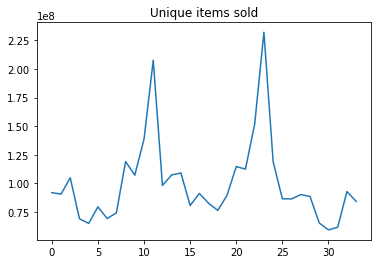

In [ ]:
df2 = sales_df[['date_block_num', 'sales']].groupby('date_block_num').sum()
plt.plot(df2.sales)
plt.title("Unique items sold")

In [ ]:
sales_df_2013 = sales_df[sales_df.fy.eq(2013)]
sales_df_2014 = sales_df[sales_df.fy.eq(2014)]
sales_df_2015 = sales_df[sales_df.fy.eq(2015)]

In [ ]:
sales_df_2013

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_idr,item_category_id,item_category_name,item_category_idr,shop_name,shop_idr,fw,fm,fy,wd,sales
0,2013-01-02,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),22154,37,Кино - Blu-Ray,37,"Ярославль ТЦ ""Альтаир""",59,1,1,2013,2,999.00
1,2013-01-03,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,2552,58,Музыка - Винил,58,"Москва ТРК ""Атриум""",25,1,1,2013,3,899.00
2,2013-01-05,0,25,2552,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,2552,58,Музыка - Винил,58,"Москва ТРК ""Атриум""",25,1,1,2013,5,-899.00
3,2013-01-06,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,2554,58,Музыка - Винил,58,"Москва ТРК ""Атриум""",25,1,1,2013,6,1709.05
4,2013-01-15,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),2555,56,Музыка - CD фирменного производства,56,"Москва ТРК ""Атриум""",25,3,1,2013,1,1099.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1267557,2013-12-06,11,46,5671,2690.00,1.0,PS4: Контроллер игровой беспроводной синий (Du...,5671,3,Аксессуары - PS4,3,"Сергиев Посад ТЦ ""7Я""",46,49,12,2013,4,2690.00
1267558,2013-12-01,11,46,5671,2590.00,3.0,PS4: Контроллер игровой беспроводной синий (Du...,5671,3,Аксессуары - PS4,3,"Сергиев Посад ТЦ ""7Я""",46,48,12,2013,6,7770.00
1267559,2013-12-26,11,46,5669,2690.00,2.0,PS4: Контроллер игровой беспроводной красный (...,5669,3,Аксессуары - PS4,3,"Сергиев Посад ТЦ ""7Я""",46,52,12,2013,3,5380.00
1267560,2013-12-25,11,46,5669,2690.00,1.0,PS4: Контроллер игровой беспроводной красный (...,5669,3,Аксессуары - PS4,3,"Сергиев Посад ТЦ ""7Я""",46,52,12,2013,2,2690.00


In [ ]:
print(sales_df[['item_cnt_day','sales','item_price']].corr())

              item_cnt_day     sales  item_price
item_cnt_day      1.000000  0.407954    0.011197
sales             0.407954  1.000000    0.433725
item_price        0.011197  0.433725    1.000000


In [ ]:
sales_df.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_idr,item_category_id,item_category_idr,shop_idr,fw,fm,fy,wd,sales
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00,1.019723e+04,4.000138e+01,4.000138e+01,3.300173e+01,2.485817e+01,6.247717e+00,2.013777e+03,3.365686e+00,1.157732e+03
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00,6.324297e+03,1.710076e+01,1.710076e+01,1.622697e+01,1.543837e+01,3.536219e+00,7.684790e-01,1.996795e+00,5.683604e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.013000e+03,0.000000e+00,-6.897000e+04
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00,4.476000e+03,2.800000e+01,2.800000e+01,2.200000e+01,1.100000e+01,3.000000e+00,2.013000e+03,2.000000e+00,2.490000e+02
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00,9.343000e+03,4.000000e+01,4.000000e+01,3.100000e+01,2.400000e+01,6.000000e+00,2.014000e+03,4.000000e+00,4.490000e+02
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00,1.568400e+04,5.500000e+01,5.500000e+01,4.700000e+01,3.800000e+01,9.000000e+00,2.014000e+03,5.000000e+00,1.078200e+03
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03,2.216900e+04,8.300000e+01,8.300000e+01,5.900000e+01,5.200000e+01,1.200000e+01,2.015000e+03,6.000000e+00,1.829990e+06


Text(0.5, 1.0, 'Unique items sold')

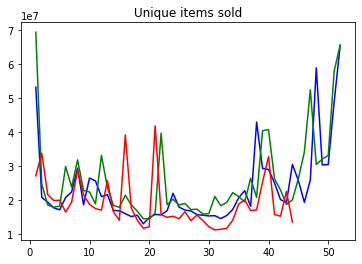

In [ ]:

df1 = sales_df_2013[['fw', 'sales']].groupby('fw').sum()
df2 = sales_df_2014[['fw', 'sales']].groupby('fw').sum()
df3 = sales_df_2015[['fw', 'sales']].groupby('fw').sum()
fig, ax = plt.subplots()
plt.plot(df1.sales,color='blue')
plt.plot(df2.sales,color='green')
plt.plot(df3.sales,color='red')
plt.title("Unique items sold")

Text(0.5, 1.0, 'Unique items sold')

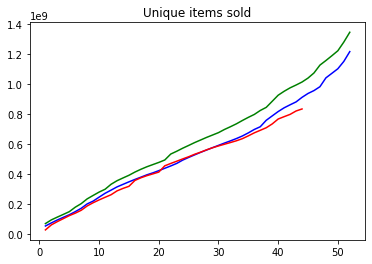

In [ ]:
df1=sales_df_2013[['fw', 'sales']].groupby('fw').sum()
df1['cum']=df1.cumsum()
df2=sales_df_2014[['fw', 'sales']].groupby('fw').sum()
df2['cum']=df2.cumsum()
df3=sales_df_2015[['fw', 'sales']].groupby('fw').sum()
df3['cum']=df3.cumsum()
fig, ax = plt.subplots()
plt.plot(df1.cum,color='blue')
plt.plot(df2.cum,color='green')
plt.plot(df3.cum,color='red')
plt.title("Unique items sold")

In [ ]:
sales_df_2013

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_idr,item_category_id,item_category_name,item_category_idr,shop_name,shop_idr,fw,fm,fy,wd,sales
0,2013-01-02,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),22154,37,Кино - Blu-Ray,37,"Ярославль ТЦ ""Альтаир""",59,1,1,2013,2,999.00
1,2013-01-03,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,2552,58,Музыка - Винил,58,"Москва ТРК ""Атриум""",25,1,1,2013,3,899.00
2,2013-01-05,0,25,2552,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,2552,58,Музыка - Винил,58,"Москва ТРК ""Атриум""",25,1,1,2013,5,-899.00
3,2013-01-06,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,2554,58,Музыка - Винил,58,"Москва ТРК ""Атриум""",25,1,1,2013,6,1709.05
4,2013-01-15,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),2555,56,Музыка - CD фирменного производства,56,"Москва ТРК ""Атриум""",25,3,1,2013,1,1099.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1267557,2013-12-06,11,46,5671,2690.00,1.0,PS4: Контроллер игровой беспроводной синий (Du...,5671,3,Аксессуары - PS4,3,"Сергиев Посад ТЦ ""7Я""",46,49,12,2013,4,2690.00
1267558,2013-12-01,11,46,5671,2590.00,3.0,PS4: Контроллер игровой беспроводной синий (Du...,5671,3,Аксессуары - PS4,3,"Сергиев Посад ТЦ ""7Я""",46,48,12,2013,6,7770.00
1267559,2013-12-26,11,46,5669,2690.00,2.0,PS4: Контроллер игровой беспроводной красный (...,5669,3,Аксессуары - PS4,3,"Сергиев Посад ТЦ ""7Я""",46,52,12,2013,3,5380.00
1267560,2013-12-25,11,46,5669,2690.00,1.0,PS4: Контроллер игровой беспроводной красный (...,5669,3,Аксессуары - PS4,3,"Сергиев Посад ТЦ ""7Я""",46,52,12,2013,2,2690.00


Text(0.5, 1.0, 'total items sold')

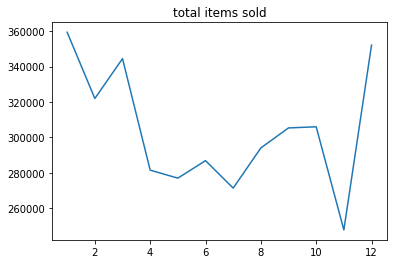

In [ ]:
df = sales_df[['fm', 'item_cnt_day']].groupby('fm').sum()

fig, ax = plt.subplots()
plt.plot(df.item_cnt_day)
plt.title("total items sold")


Text(0.5, 1.0, 'total items sold')

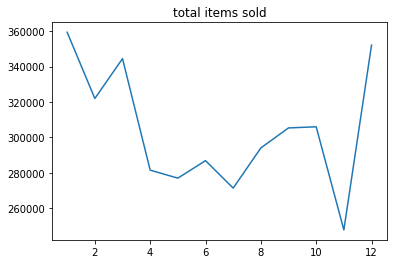

In [ ]:
f = sales_df[['date_block_num', 'item_cnt_day']].groupby('date_block_num').sum()

fig, ax = plt.subplots()
plt.plot(df.item_cnt_day)
plt.title("total items sold")


Text(0.5, 1.0, 'Total sales generated')

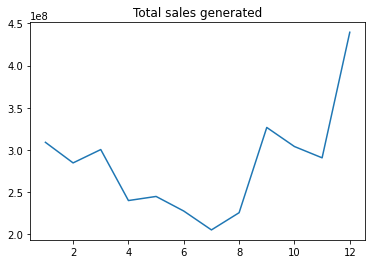

In [ ]:
df = sales_df[['fm', 'sales']].groupby('fm').sum()

f, ax = plt.subplots()
plt.plot(df.sales)
plt.title("Total sales generated")

Text(0.5, 1.0, 'Total sales generated')

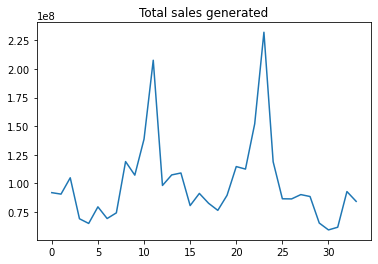

In [ ]:

df = sales_df[['date_block_num', 'sales']].groupby('date_block_num').sum()

f, ax = plt.subplots()
plt.plot(df.sales)
plt.title("Total sales generated")

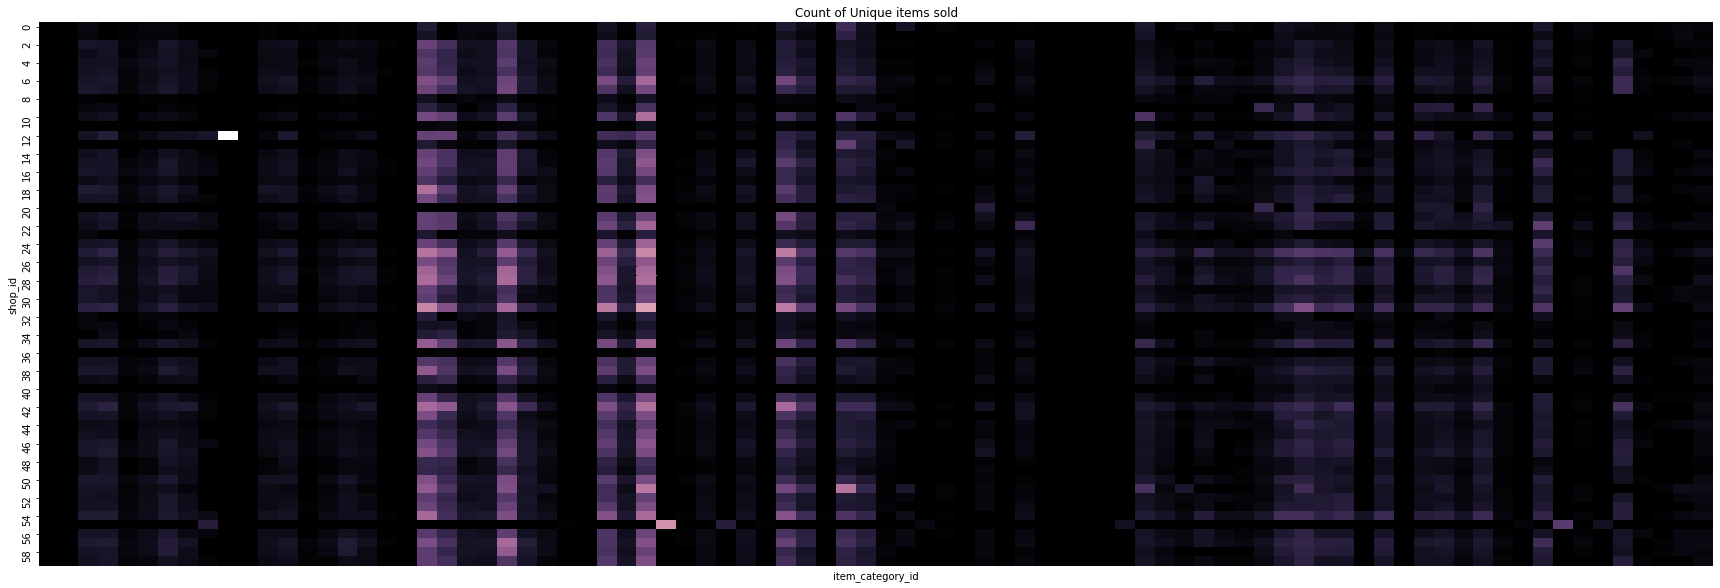

In [ ]:
hm = sales_df.pivot_table(index='shop_id', columns='item_category_id', values='sales', aggfunc='nunique', fill_value=0)

fig, ax = plt.subplots(figsize=(30,10))
cmap = sns.cubehelix_palette(8, as_cmap=True, dark=0, light=1, gamma=0.8, reverse=True)
plt.title("Count of Unique items sold")
_ = sns.heatmap(hm, ax=ax, cmap=cmap, cbar=False, xticklabels=False)


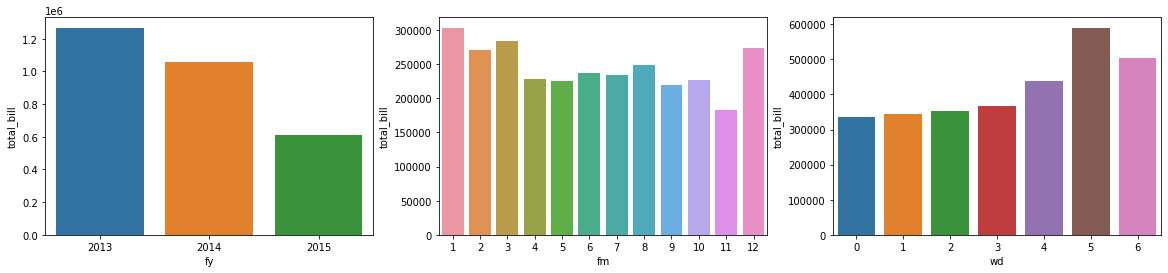

In [ ]:
year_count = sales_df.groupby('fy').count().item_id.reset_index()
year_count.columns = ['fy', 'total_bill']
month_count = sales_df.groupby('fm').count().item_id.reset_index()
month_count.columns = ['fm', 'total_bill']
weekday_count = sales_df.groupby('wd').count().item_id.reset_index()
weekday_count.columns = ['wd', 'total_bill']

fig, axes = plt.subplots(1, 3, figsize=(20, 4))
sns.barplot(x='fy', y='total_bill', data=year_count, ax=axes[0])
sns.barplot(x='fm', y='total_bill', data=month_count, ax=axes[1])
sns.barplot(x='wd', y='total_bill', data=weekday_count, ax=axes[2])
plt.show()

In [ ]:
year_count

,fy,total_bill
0,2013,1267562
1,2014,1055861
2,2015,612426


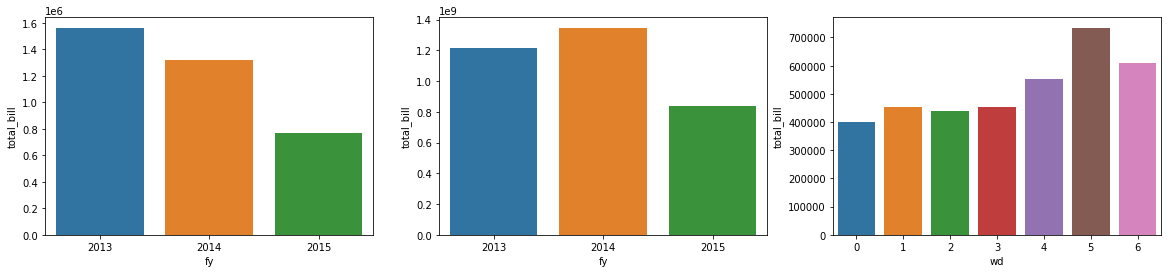

In [ ]:
year_count = sales_df.groupby('fy').sum().item_cnt_day.reset_index()
year_count.columns = ['fy', 'total_bill']
month_count = sales_df.groupby('fy').sum().sales.reset_index()
month_count.columns = ['fy', 'total_bill']
weekday_count = sales_df.groupby('wd').sum().item_cnt_day.reset_index()
weekday_count.columns = ['wd', 'total_bill']

fig, axes = plt.subplots(1, 3, figsize=(20, 4))
sns.barplot(x='fy', y='total_bill', data=year_count, ax=axes[0])
sns.barplot(x='fy', y='total_bill', data=month_count, ax=axes[1])
sns.barplot(x='wd', y='total_bill', data=weekday_count, ax=axes[2])
plt.show()

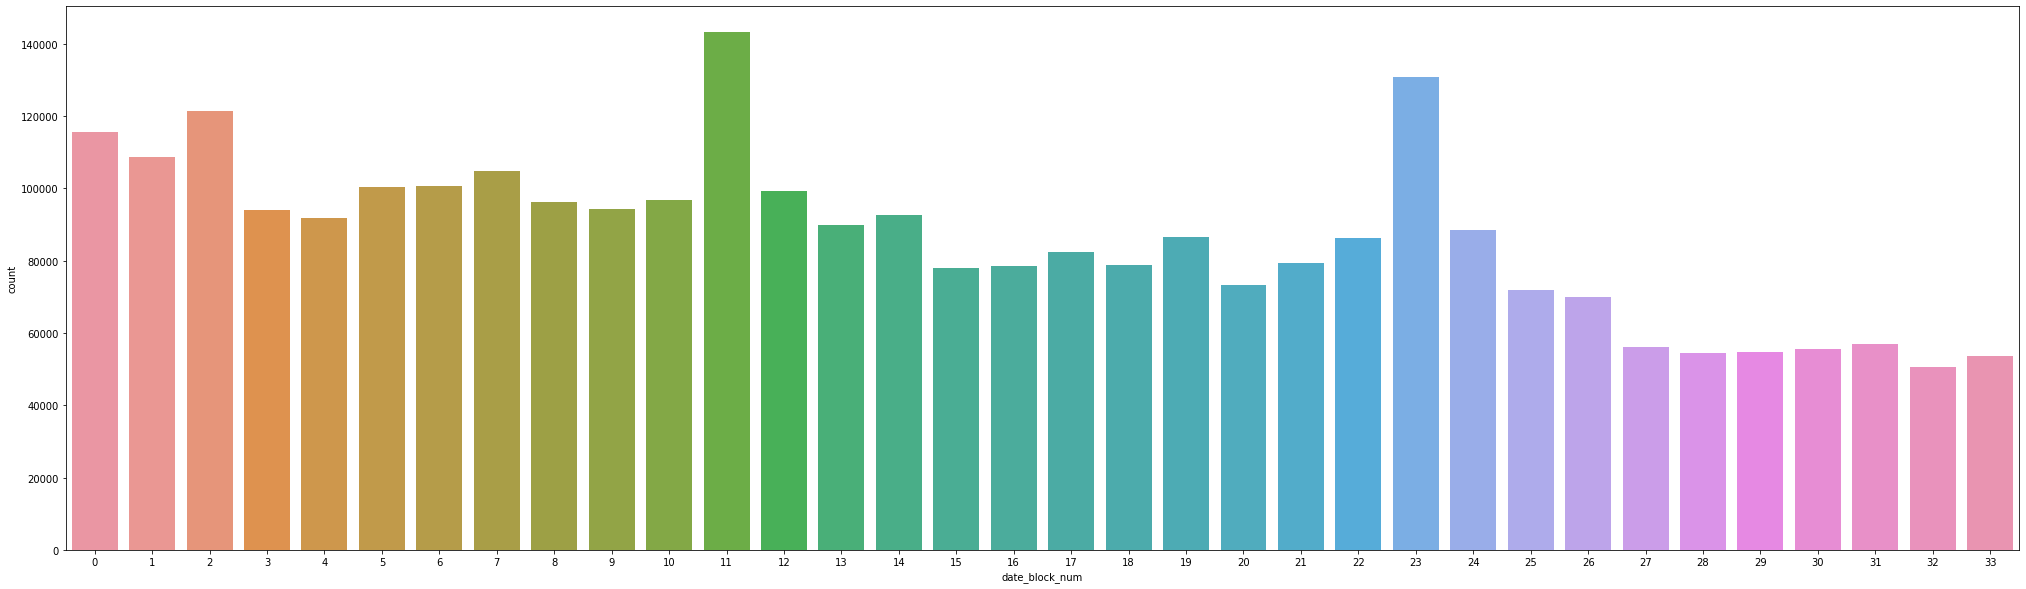

In [ ]:
plt.figure(figsize=(35,10))
sns.countplot(x='date_block_num', data=sales_df);

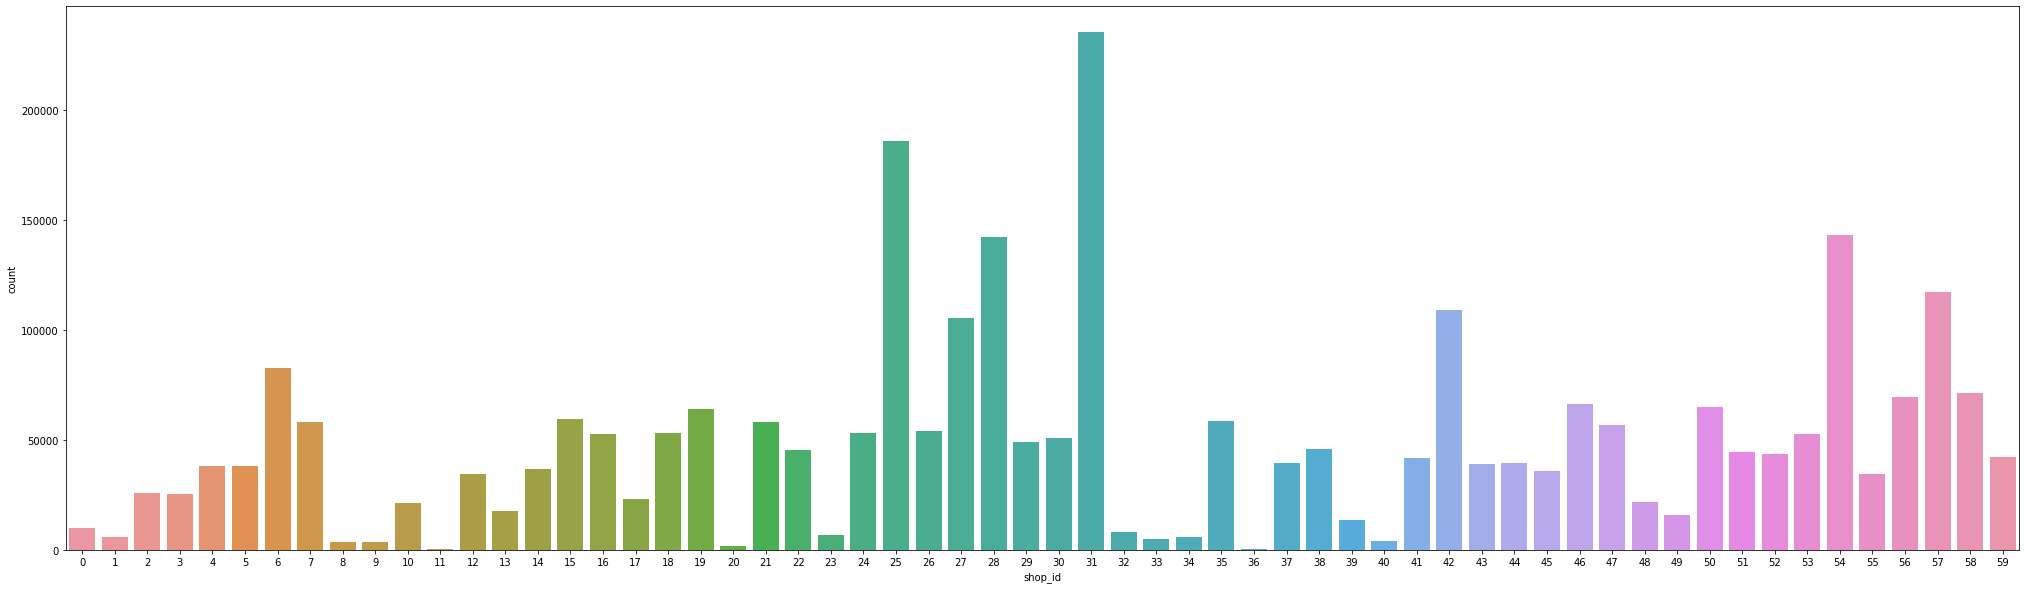

In [ ]:
plt.figure(figsize=(35,10))
sns.countplot(x='shop_id', data=sales_df)

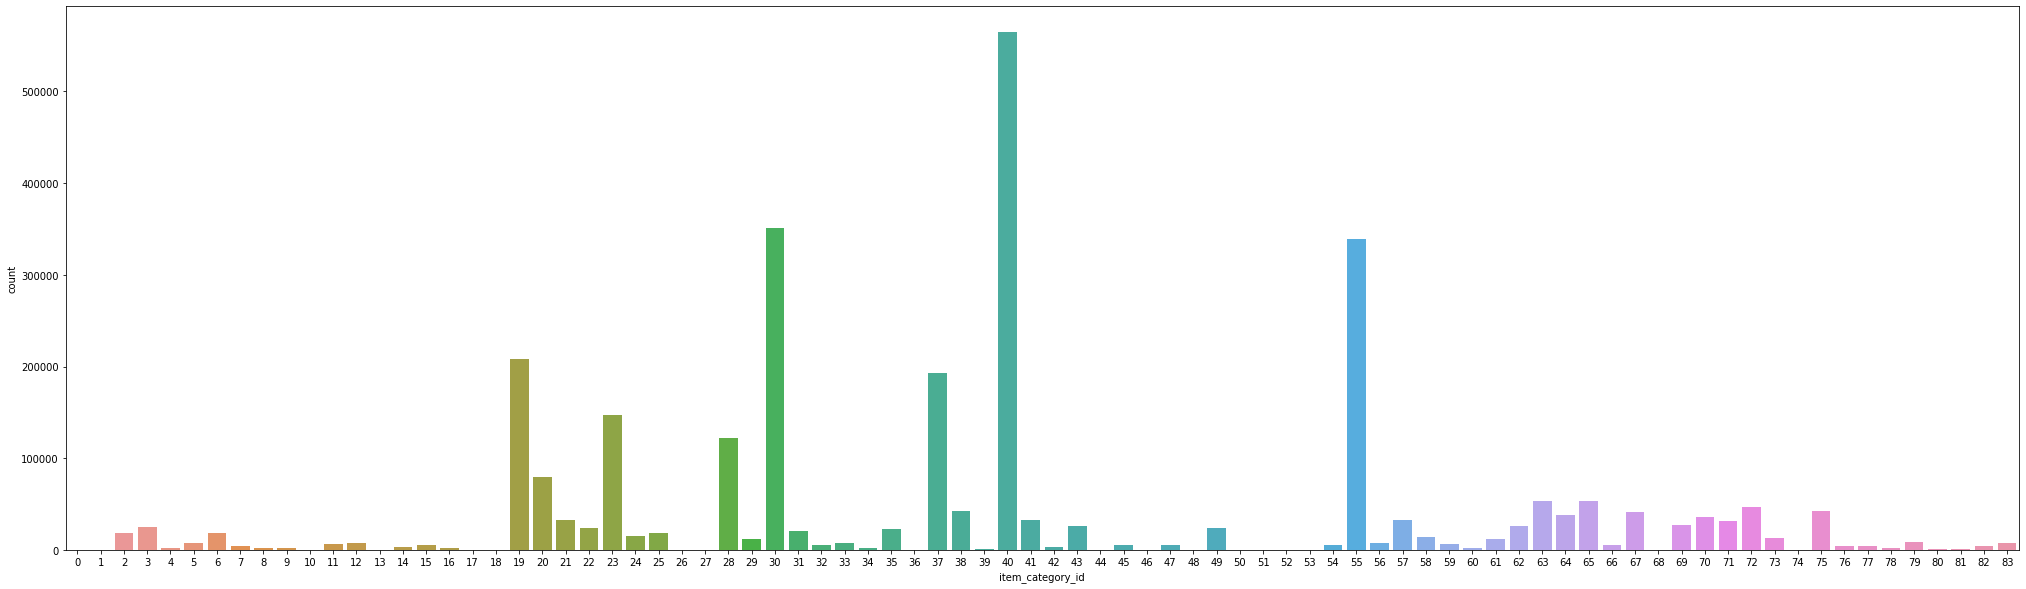

In [ ]:
plt.figure(figsize=(35,10))
sns.countplot(x='item_category_id', data=sales_df)

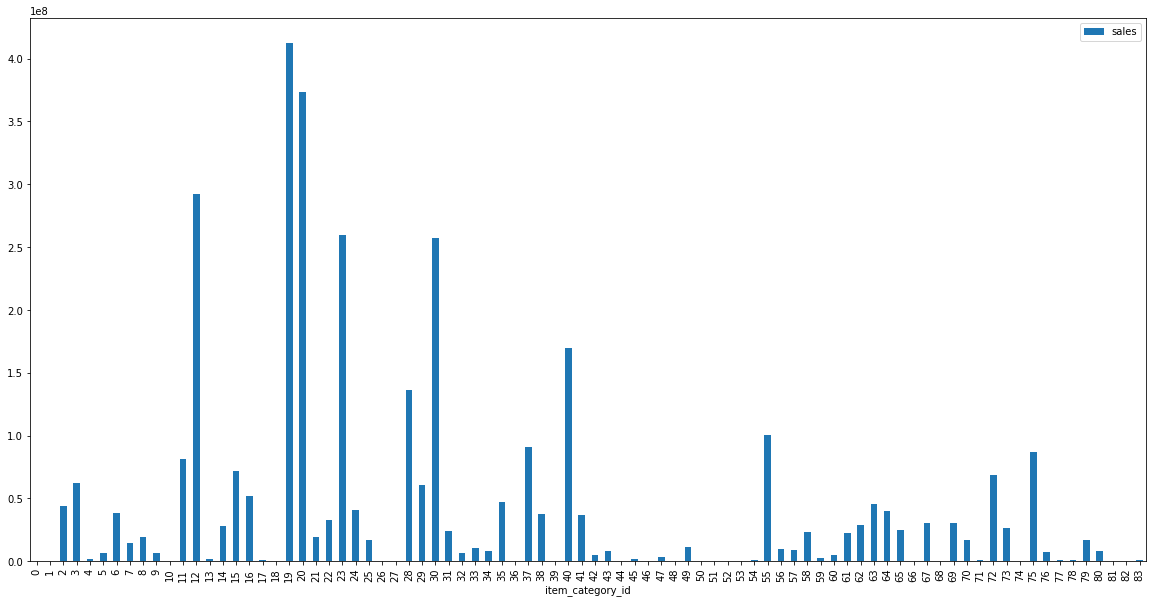

In [ ]:
plt.rcParams["figure.figsize"] = (20,10)
#$finaldataset.groupby(['shop_id']).sum().sort_values('Sales').plot.bar(y='Sales',color='g')
sales_df.groupby(['item_category_id']).sum().plot.bar(y='sales')

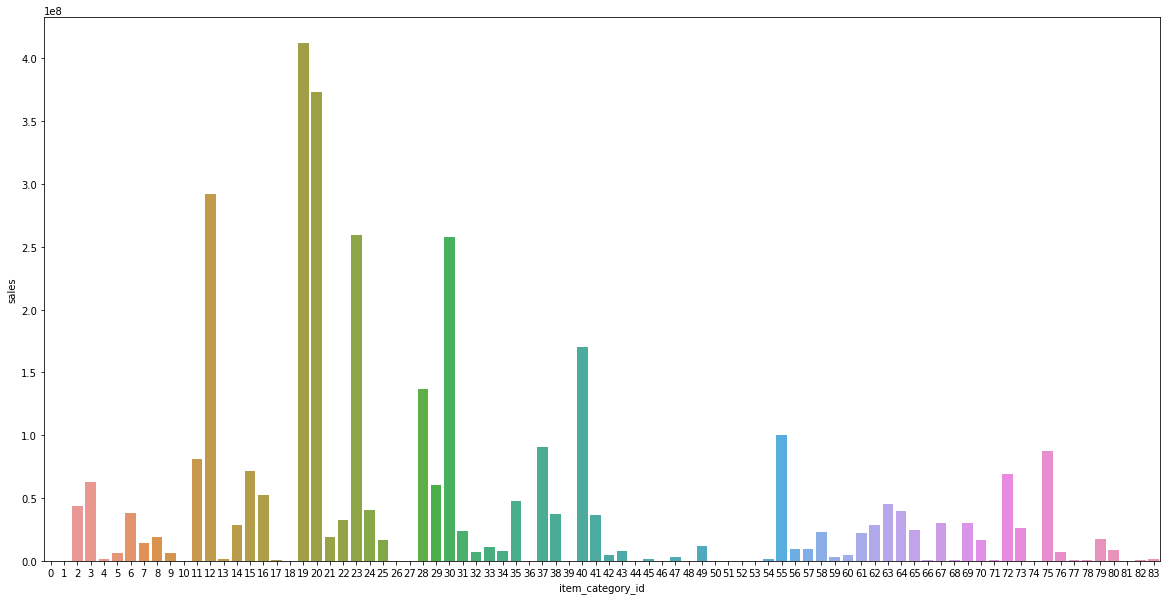

In [ ]:
sales_monthly = pd.DataFrame(sales_df.groupby(['item_category_id'])['sales'].sum().reset_index().sort_values('item_category_id'))
plt.figure(figsize=(20,10))
sns.barplot(x="item_category_id", y="sales", data=sales_monthly , order=sales_monthly['item_category_id'])

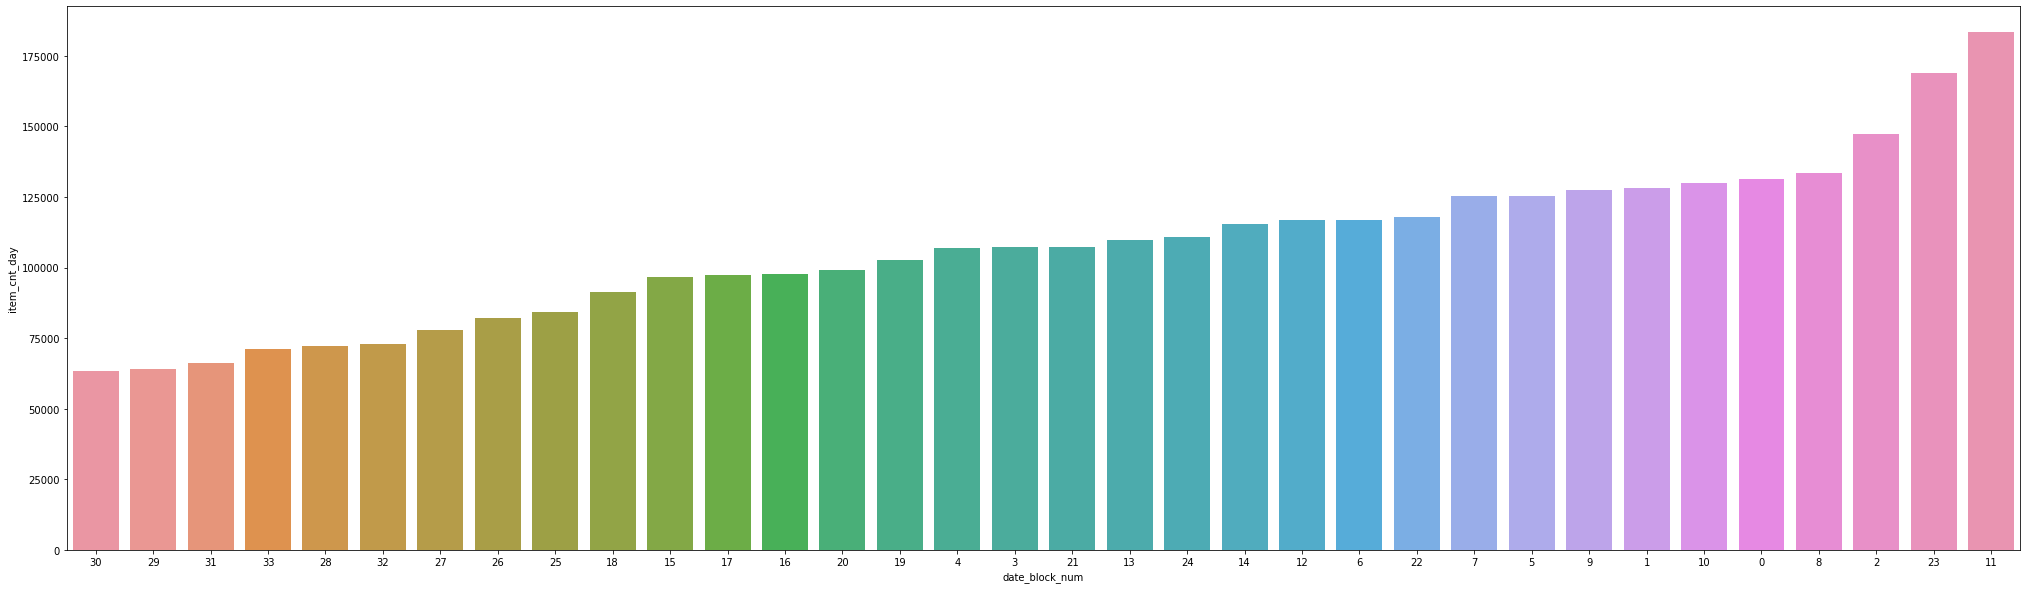

In [ ]:
sales_monthly = pd.DataFrame(sales_df.groupby(['date_block_num'])['item_cnt_day'].sum().reset_index().sort_values('item_cnt_day'))
plt.figure(figsize=(35,10))
sns.barplot(x="date_block_num", y="item_cnt_day", data=sales_monthly , order=sales_monthly['date_block_num'])

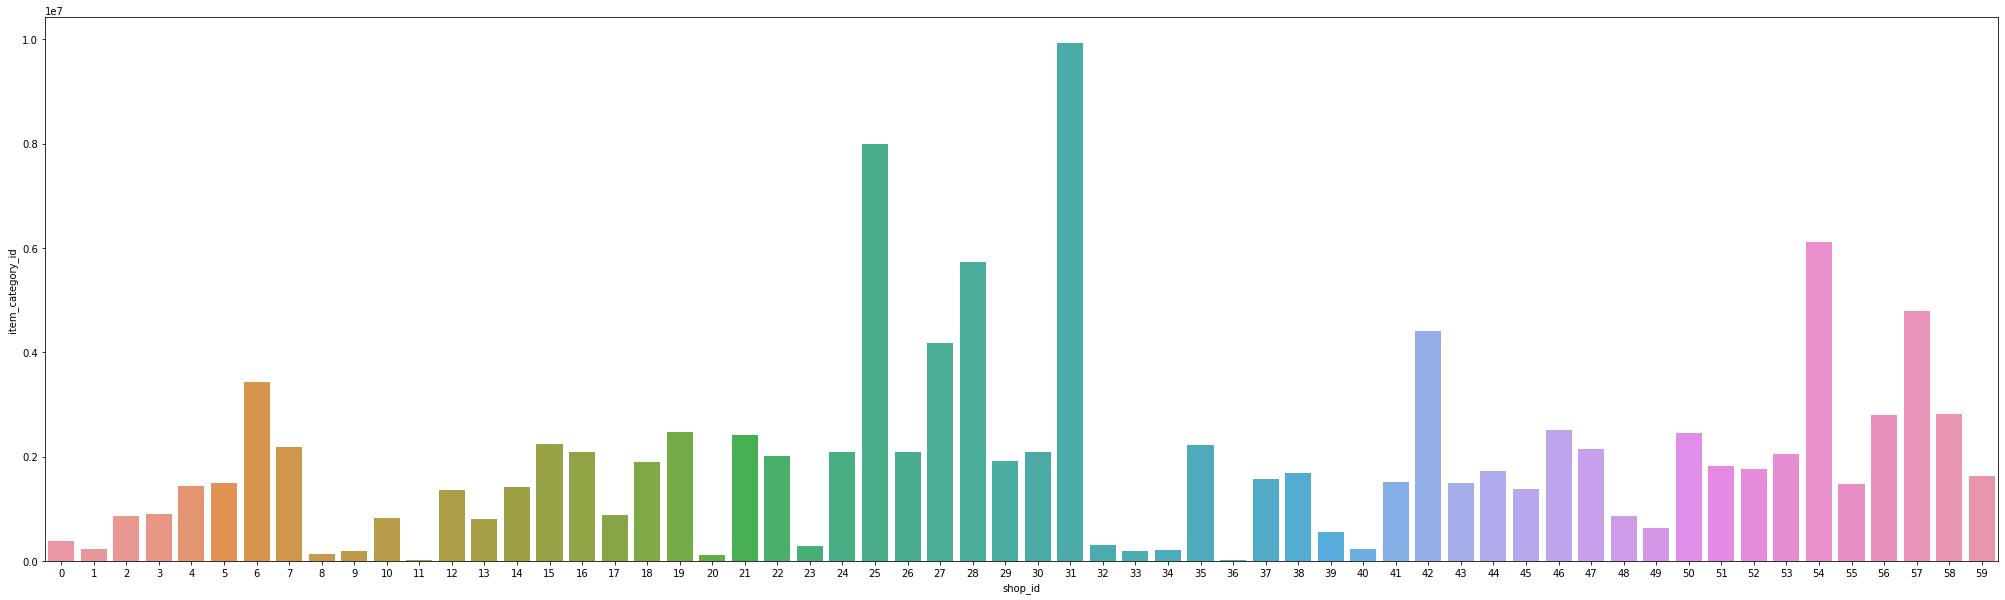

In [ ]:
sales_monthly = pd.DataFrame(sales_df.groupby(['shop_id'])['item_category_id'].sum().reset_index().sort_values('shop_id'))
plt.figure(figsize=(35,10))
sns.barplot(x="shop_id", y="item_category_id", data=sales_monthly , order=sales_monthly['shop_id'])

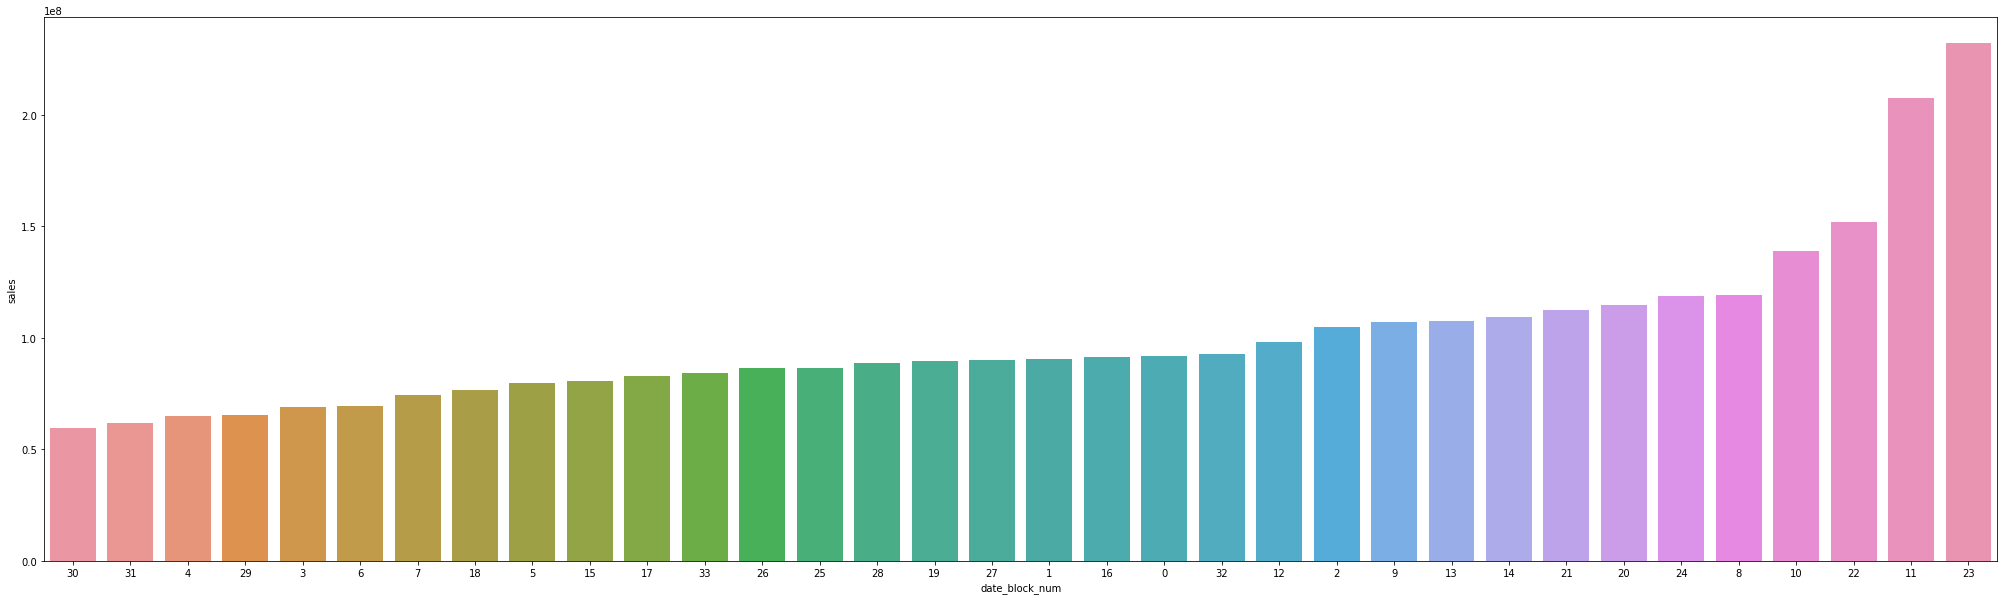

In [ ]:
sales_monthly_sales= pd.DataFrame(sales_df.groupby(['date_block_num'])['sales'].sum().reset_index().sort_values('sales'))
plt.figure(figsize=(35,10))
sns.barplot(x="date_block_num", y="sales", data=sales_monthly_sales, order=sales_monthly_sales['date_block_num'])

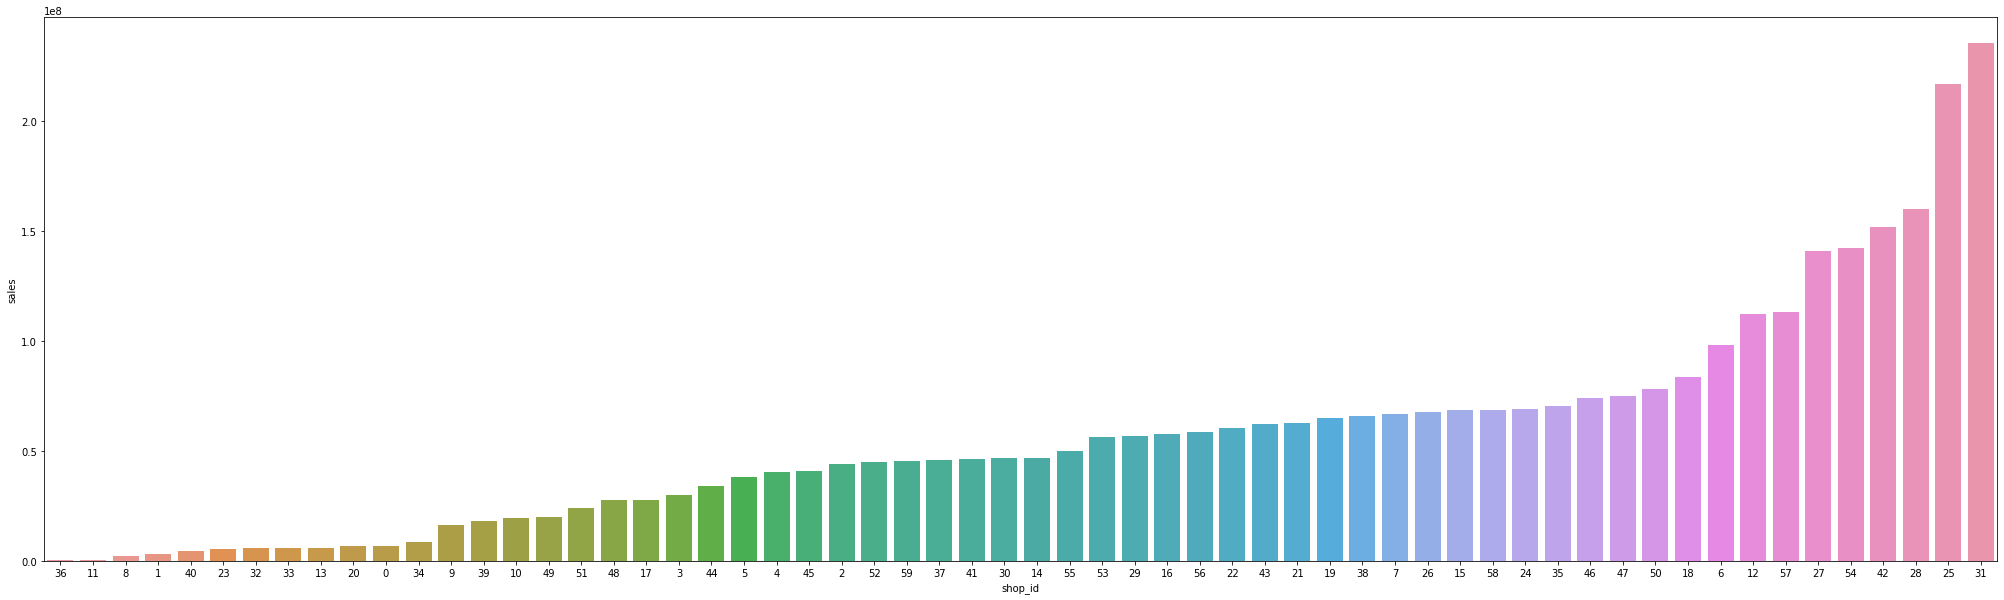

In [ ]:
sales_monthly_sales= pd.DataFrame(sales_df.groupby(['shop_id'])['sales'].sum().reset_index().sort_values('sales'))
plt.figure(figsize=(35,10))
sns.barplot(x="shop_id", y="sales", data=sales_monthly_sales, order=sales_monthly_sales['shop_id'])

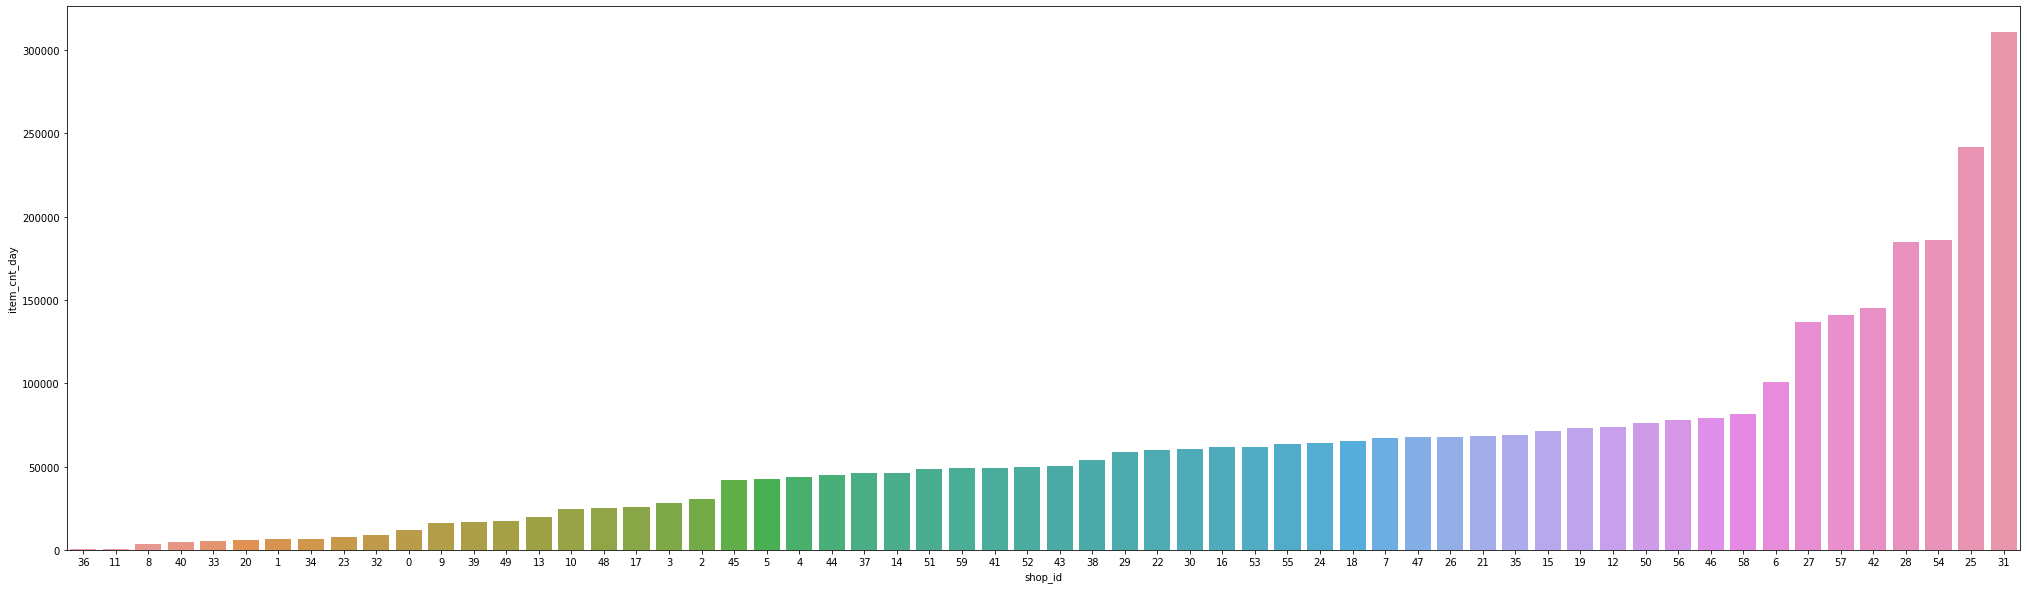

In [ ]:
sales_monthly_sales= pd.DataFrame(sales_df.groupby(['shop_id'])['item_cnt_day'].sum().reset_index().sort_values('item_cnt_day'))
plt.figure(figsize=(35,10))
sns.barplot(x="shop_id", y="item_cnt_day", data=sales_monthly_sales, order=sales_monthly_sales['shop_id'])

Text(0.5, 1.0, 'Unique items sold')

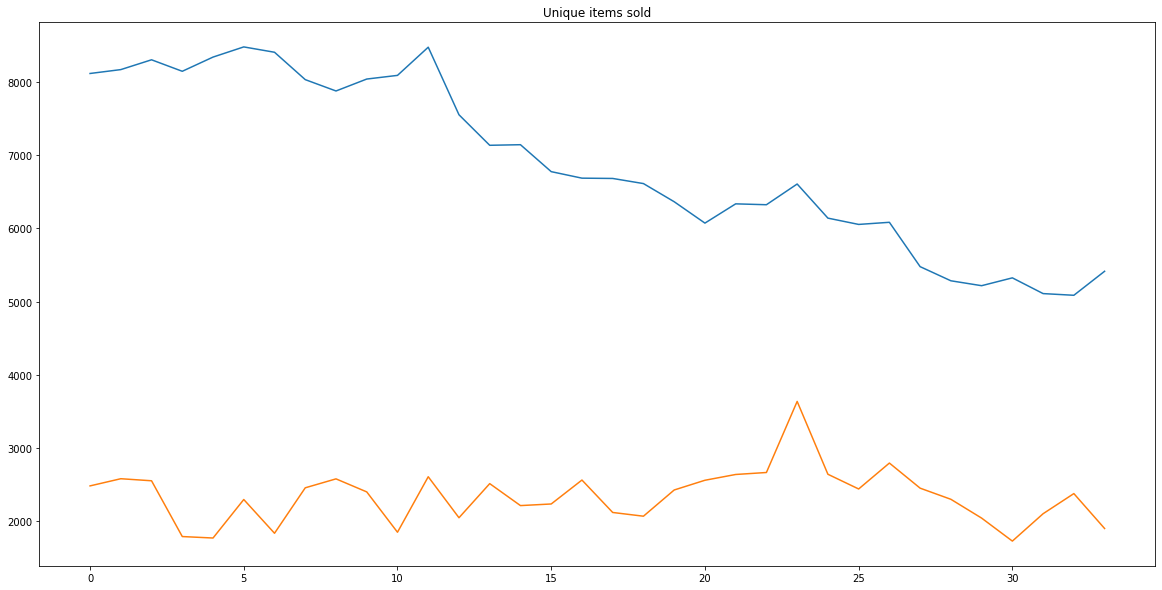

In [ ]:
df = sales_df[['date_block_num', 'item_id']].groupby('date_block_num').nunique()
df1 = sales_df[['date_block_num', 'sales']].groupby('date_block_num').nunique()

plt.plot(df.item_id)
plt.plot(df1.sales)
plt.title("Unique items sold")




In [ ]:
print(sales_df[['item_category_id','shop_id']].corr())

                  item_category_id  shop_id
item_category_id           1.00000  0.01938
shop_id                    0.01938  1.00000


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
sales_df2['item_category_name_len'] = sales_df2['item_category_name'].apply(len)
sales_df2['item_category_name_wc'] = sales_df2['item_category_name'].apply(lambda x: len(str(x).split(' '))) 

sales_df2['item_name_len'] = sales_df2['item_name'].apply(len)
sales_df2['item_name_wc'] = sales_df2['item_name'].apply(lambda x: len(str(x).split(' '))) 
sales_df2['shop_name_len'] = sales_df2['shop_name'].apply(len)
sales_df2['shop_name_wc'] = sales_df2['shop_name'].apply(lambda x: len(str(x).split(' '))) 

NameError: ignored

In [ ]:
sales_df2=sales_df

In [ ]:
sales_df2

In [ ]:
feature_cnt = 30
tfidf = TfidfVectorizer(max_df=0.6, max_features=feature_cnt, ngram_range=(1, 2))
txtFeatures = pd.DataFrame(tfidf.fit_transform(sales_df2['item_category_name']).toarray())
cols = txtFeatures.columns
for i in range(feature_cnt):
    sales_df2['item_category_name_tfidf_' + str(i)] = txtFeatures[cols[i]]
print('item_categories：')
print(sales_df2
      .head())

In [ ]:
txtFeatures = pd.DataFrame(tfidf.fit_transform(sales_df2['item_name']).toarray())
cols = txtFeatures.columns
for i in range(feature_cnt):
    sales_df2['item_name_tfidf_' + str(i)] = txtFeatures[cols[i]]
print('item_name:')
print(sales_df2
      .head())

In [ ]:
txtFeatures = pd.DataFrame(tfidf.fit_transform(sales_df2['shop_name']).toarray())
cols = txtFeatures.columns
for i in range(feature_cnt):
    sales_df2['shop_name_tfidf_' + str(i)] = txtFeatures[cols[i]]
print('shop_name:')
print(sales_df2
      .head())

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn import datasets, svm, metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score

from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import f1_score 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns





list =[['DecisionTreeClassifierEnthropy',DecisionTreeClassifier(criterion = 'entropy', random_state = 0)],
       ['DecisionTreeClassifierGini',DecisionTreeClassifier(criterion = 'gini', random_state = 0)],
       
       ["K-SVM_rbf",SVC(kernel = 'rbf', random_state = 0)],
       ["SVM",svm.SVC(gamma=0.001, C=100)],
       ["NB",GaussianNB()],
       ["KNN",KNeighborsClassifier(n_neighbors=28)],
       ["LogisticRegression",LogisticRegression(random_state = 0) ],
       ["RandomForestClassifier_sqrt",RandomForestClassifier(n_estimators=1000,criterion ='entropy' ,max_features='sqrt')],
       ["RandomForestClassifier_log2",RandomForestClassifier(n_estimators=1000,criterion ='entropy' ,max_features='log2')]
       ,["AdaBoostClassifier",AdaBoostClassifier(n_estimators=100, learning_rate=1.0, algorithm='SAMME.R', random_state=None)]
       ]
for i in list: 
    model=i[1]
    fittedModel = model.fit(X_train, y_train)
    y_pred = fittedModel.predict(X_test)
    #y_pred = model_selection.cross_val_predict(model,features,targets, cv=7)
    #y_pred = model_selection.cross_val_predict(model,features,targets, cv=7)
    #print(confusion_matrix(y_test, y_pred))
    print(i[0]+':'+str(accuracy_score(y_test, y_pred)))


In [ ]:
sales_train_df1=sales_train_df[sales_train_df.item_cnt_day<900]


In [ ]:
sales_train_df1=sales_train_df1[sales_train_df1.item_price<100000]

In [ ]:
sales_train_df1['sales']=sales_train_df1['item_price']*sales_train_df1['item_cnt_day']

In [ ]:
sales_train_df1['date']=pd.to_datetime(sales_train_df1['date'], format='%d.%m.%Y', errors='coerce')
sales_train_df1['fm']=sales_df['date'].dt.month

In [ ]:
sales_train_df1.info()

In [ ]:
sales_train_salesmon = sales_train_df1.groupby(['fm'])['sales'].sum().reset_index()

In [ ]:
sales_train_salesmon = sales_train_df1.groupby(['date_block_num'])['sales'].sum().reset_index()

In [ ]:
sales_train_salesmon


In [ ]:
sales_train_salesmon.astype('float')
plt.figure(figsize=(16,8))
plt.title('Total Sales of the company')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.plot(sales_train_salesmon);

In [ ]:
result = seasonal_decompose(sales_train_salesmon['sales'],model = 'multiplicative',freq=12)

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [ ]:
fig_acf = plot_acf(sales_train_salesmon['sales'])

In [ ]:
fig_pacf = plot_pacf(sales_train_salesmon['sales'])

In [ ]:
def test_stationarity(timeseries):
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
test_stationarity(sales_train_salesmon)


In [ ]:
sales_train_salesmon.info()

In [ ]:
sales_train_salesmon['3-months-SMA'] = sales_train_salesmon['sales'].rolling(window=3).mean()
sales_train_salesmon['6-months-SMA'] = sales_train_salesmon['sales'].rolling(window=6).mean()

In [ ]:
sales_train_salesmon.plot(figsize=(10,8))

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose 

In [ ]:
sales_train_salesmon.index = pd.to_datetime(sales_train_salesmon.index, format='%m')

In [ ]:
sales_train_salesmon.set_index('fm',inplace=True)

In [ ]:
sales_train_salesmon

In [ ]:
sales_train_salesmon = sales_train_salesmon.asfreq(pd.infer_freq(sales_train_salesmon.index))

In [ ]:
from datetime import datetime
sales_train_df2=sales_train_df1['date'].apply(lambda x: x.strftime('%Y-%m'))

In [ ]:
sales_train_salesmon

In [ ]:
avg, dev = sales_train_salesmon.mean(), sales_train_salesmon.std()

In [ ]:
dev

In [ ]:
sales_train_salesmon = (sales_train_salesmon - avg) / dev

In [ ]:
plot_series(sales_train_salesmon)
plt.axhline(0, linestyle='--', color='k', alpha=0.3)

In [ ]:
sales_train_salesmon

In [ ]:
result = seasonal_decompose(sales_train_salesmon2['sales'],model = 'multiplicative')

In [ ]:
result.plot()

In [ ]:
avg, dev = sales_train_salesmon.mean(), sales_train_salesmon.std()


In [ ]:
sales_train_salesmon

In [ ]:
def plot_series(series):
    plt.figure(figsize=(12,6))
    plt.plot(sales_train_salesmon, color='red')
    plt.ylabel('Search Frequency for "sales"', fontsize=16)

In [ ]:

sales_train_salesmon = (sales_train_salesmon - avg) / dev
plot_series(sales_train_salesmon)
plt.axhline(0, linestyle='--', color='k', alpha=0.3)